# Loan Analysis Project

In [3]:
import loans
import search
import time
import matplotlib.pyplot as plt
import pickle
%load_ext autoreload
%autoreload 2

## Part 3: 'Merchants Bank of Indiana' Analysis

In [5]:
# Create Bank object for "Merchants Bank of Indiana"
merchants_india = loans.Bank("Merchants Bank of Indiana")

### 1: What is the average interest rate for the bank?

In [7]:
#Q1
loan_list = merchants_india.loan_list
total = 0
count = 0
for loan in loan_list:
    rate = loan.interest_rate
    if rate != -1:
        total += rate
        count += 1
total/count

3.2181818181818183

### 2: How many applicants are there per loan, on average?

In [9]:
#Q2
applicants = 0
loan_count = 0
for loan in loan_list:
    applicants += len(loan.applicants)
    loan_count += 1
applicants/loan_count

1.6724137931034482

### 3: What is the distribution of ages?

In [11]:
#Q3
distribution_dict = {}
app_list = []
for loan in loan_list:
    app_list += loan.applicants
for app in app_list:
    age = str(app.age)
    if age in distribution_dict:
        distribution_dict[age] += 1
    else:
        distribution_dict[age] = 1

distribution_dict

{'65-74': 6, '<25': 2, '35-44': 43, '25-34': 28, '45-54': 16, '55-64': 2}

### Binary Search Tree of Loans

In [13]:
mbi_tree = search.BST()

for loan in loan_list:
    mbi_tree.add(loan.interest_rate, loan)
    
mbi_tree.root.values

[<Loan: 3.875% on $135000.0 with 2 applicant(s)>,
 <Loan: 3.875% on $105000.0 with 2 applicant(s)>]

### 4: How many interest rate values are missing?

In [15]:
#Q4
len(mbi_tree[-1])

3


### 5: How tall is the tree?

In [17]:
#Q5
mbi_tree.height()

8

## Part 4: 'Landmark Credit Union' Analysis

In [19]:
landmark = loans.Bank("Landmark Credit Union")

landmark_tree = search.BST()

for loan in landmark.loan_list:
    landmark_tree.add(loan.interest_rate, loan)

### 6: How long does it take to add the first 15,000 loans to the tree?

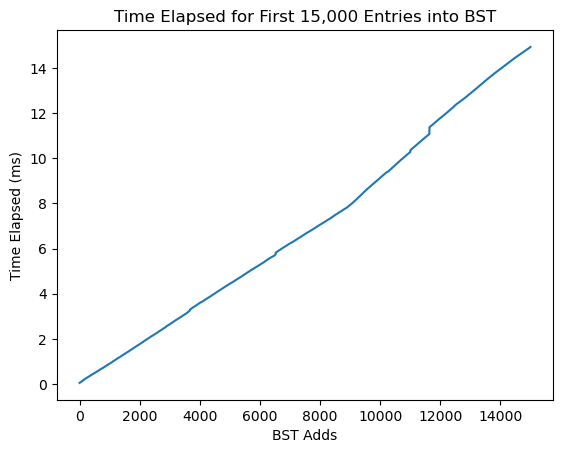

In [21]:
#Q6

landmark_time_tree = search.BST()
c = 0
adds = []
t_elapsed = []
t0 = time.time()

for loan in landmark.loan_list:
    landmark_time_tree.add(loan.interest_rate, loan)
    tx = time.time()
    c += 1
    if c <= 15000:
        adds.append(c)
        t_elapsed.append((tx-t0)*1000)
    
fig, ax = plt.subplots()

ax.plot(adds, t_elapsed, label='BST Adds')

ax.set_ylabel("Time Elapsed (ms)")
ax.set_xlabel("BST Adds")
ax.set_title("Time Elapsed for First 15,000 Entries into BST")

with open("Q6.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### 7: How fast are tree lookups?

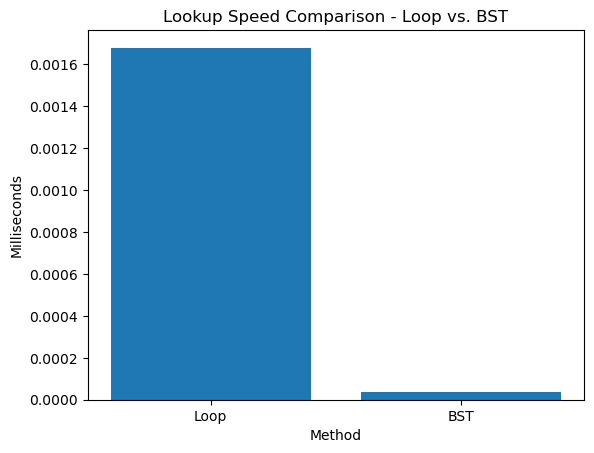

In [23]:
#Q7

c=0
t1 = time.time()
for loan in landmark.loan_list:
    if loan.interest_rate == 199:
        c += 1
t2 = time.time()

t3 = time.time()
len(landmark_tree[1.99])
t4 = time.time()

fig, ax = plt.subplots()

# PLOT HERE
ax.bar(['Loop', 'BST'], [t2-t1, t4-t3])
ax.set_ylabel('Milliseconds')
ax.set_xlabel('Method')
ax.set_title('Lookup Speed Comparison - Loop vs. BST')

with open("Q7.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### Q8: What is the distribution of amount of racial identities across all applicants?

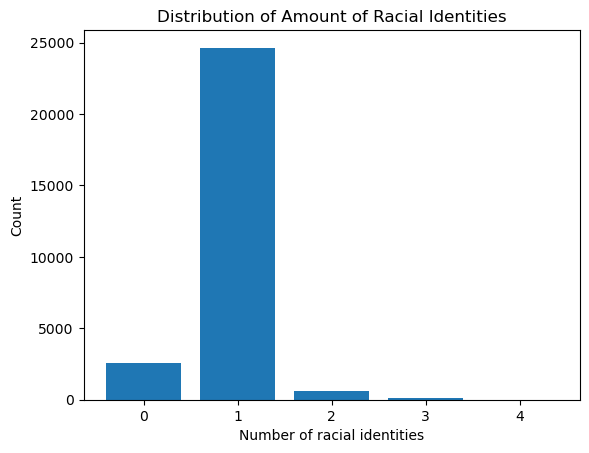

In [25]:
data = {}
for loan in landmark.loan_list:
    for app in loan.applicants:
        if len(app.race) not in data:
            data[len(app.race)]=1
        else:
            data[len(app.race)]+=1
    
    
fig, ax = plt.subplots()

ax.bar(data.keys(), data.values(), label='Number of racial identities')
ax.set_ylabel('Count')
ax.set_xlabel('Number of racial identities')
ax.set_title('Distribution of Amount of Racial Identities')

with open("Q8.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

In [26]:
data

{1: 24647, 0: 2570, 3: 126, 2: 618, 4: 12}

### 9: How many leaf nodes are in the tree?

In [28]:
#Q9

def count_leaves_helper(node):
    if node == None:
        return 0
    elif node.left==None and node.right==None:
        return 1
    return count_leaves_helper(node.left) + count_leaves_helper(node.right)

count_leaves_helper(landmark_tree.root)

63

### Q10: What is the third largest interest rate in the Bank BST?

In [30]:
def get_top_n_keys(node, N, result):
    if node is None or len(result) >= N:
        return

    get_top_n_keys(node.right, N, result)

    if len(result) < N:
        result.append(node.key)

    get_top_n_keys(node.left, N, result)

result = []
get_top_n_keys(landmark_tree.root, 3, result)

sorted(result)[0]

9.85